# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | baotou
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | thinadhoo
Processing Record 4 of Set 1 | betio village
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | labrador city
Processing Record 8 of Set 1 | grand falls-windsor
Processing Record 9 of Set 1 | bakanas
Processing Record 10 of Set 1 | svetlyy
Processing Record 11 of Set 1 | huarmey
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | al ghayzah
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | tsengel
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | nizhnesortymskiy
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 |

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,baotou,40.6522,109.8222,272.89,28,0,1.19,CN,1701493169
1,petropavlovsk-kamchatsky,53.0452,158.6483,269.48,81,20,8.00,RU,1701493026
2,thinadhoo,0.5333,72.9333,301.05,76,81,5.64,MV,1701493169
3,betio village,1.3580,172.9211,304.17,74,15,4.11,KI,1701493169
4,iqaluit,63.7506,-68.5145,268.00,62,75,8.75,CA,1701493158


In [8]:
#Convert Kelvin to Celsius
for column in city_data_df.filter(like='Max Temp').columns:
    city_data_df[column] = city_data_df[column] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,baotou,40.6522,109.8222,-0.26,28,0,1.19,CN,1701493169
1,petropavlovsk-kamchatsky,53.0452,158.6483,-3.67,81,20,8.00,RU,1701493026
2,thinadhoo,0.5333,72.9333,27.90,76,81,5.64,MV,1701493169
3,betio village,1.3580,172.9211,31.02,74,15,4.11,KI,1701493169
4,iqaluit,63.7506,-68.5145,-5.15,62,75,8.75,CA,1701493158


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,baotou,40.6522,109.8222,-0.26,28,0,1.19,CN,1701493169
1,petropavlovsk-kamchatsky,53.0452,158.6483,-3.67,81,20,8.00,RU,1701493026
2,thinadhoo,0.5333,72.9333,27.90,76,81,5.64,MV,1701493169
3,betio village,1.3580,172.9211,31.02,74,15,4.11,KI,1701493169
4,iqaluit,63.7506,-68.5145,-5.15,62,75,8.75,CA,1701493158


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

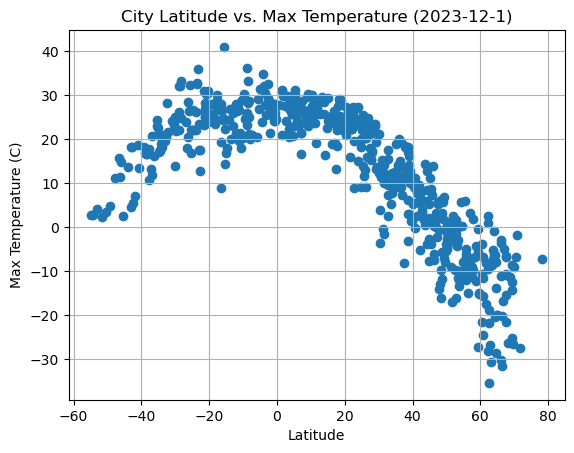

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-12-1)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

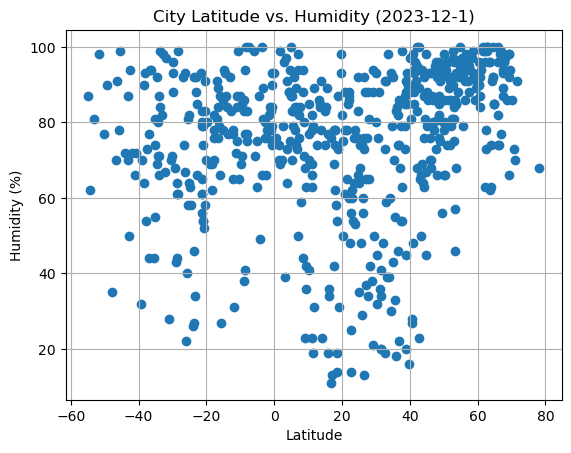

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-12-1)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

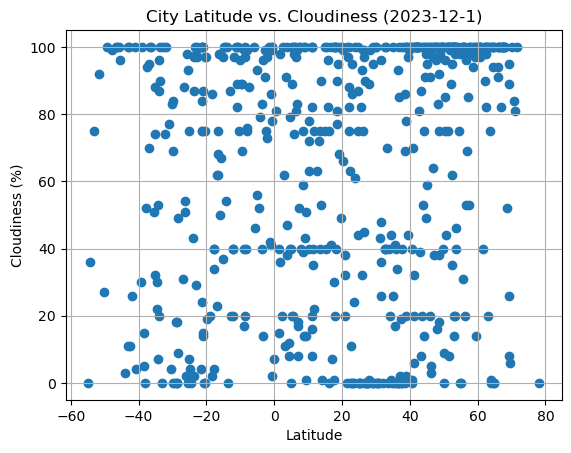

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-12-1)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

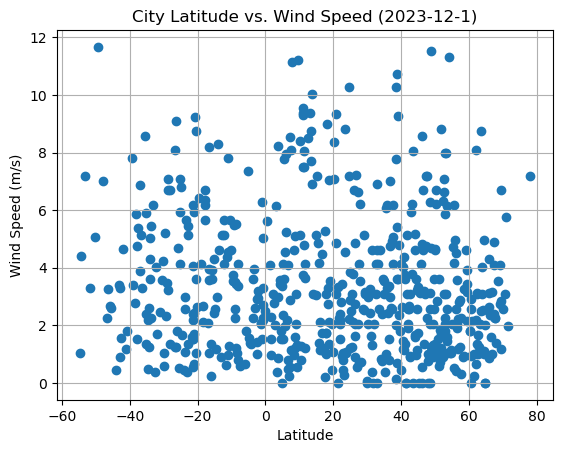

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-12-1)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, a, b, c, d):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    def linear_model(x):
        return slope * x + intercept
    regress_values = linear_model(np.array(x))
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, (c, d), fontsize=15, color="red")
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(f"The r-value is: {r_value**2}", ha='right')
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0),:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,baotou,40.6522,109.8222,-0.26,28,0,1.19,CN,1701493169
1,petropavlovsk-kamchatsky,53.0452,158.6483,-3.67,81,20,8.00,RU,1701493026
2,thinadhoo,0.5333,72.9333,27.90,76,81,5.64,MV,1701493169
3,betio village,1.3580,172.9211,31.02,74,15,4.11,KI,1701493169
4,iqaluit,63.7506,-68.5145,-5.15,62,75,8.75,CA,1701493158


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0),:])

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port-aux-francais,-49.3500,70.2167,4.78,90,100,11.67,TF,1701493170
10,huarmey,-10.0681,-78.1522,20.31,87,96,4.60,PE,1701493171
11,grytviken,-54.2811,-36.5092,2.78,62,36,4.40,GS,1701493096
14,puerto ayora,-0.7393,-90.3518,24.75,93,99,2.24,EC,1701493004
15,ushuaia,-54.8000,-68.3000,2.81,87,0,1.03,AR,1701493167
...,...,...,...,...,...,...,...,...,...
561,ilhabela,-23.7781,-45.3581,22.03,92,87,1.07,BR,1701493381
565,rockhampton,-23.3833,150.5000,35.94,34,100,5.66,AU,1701493214
566,swakopmund,-22.6833,14.5333,17.47,85,97,1.34,NaN,1701493383


###  Temperature vs. Latitude Linear Regression Plot

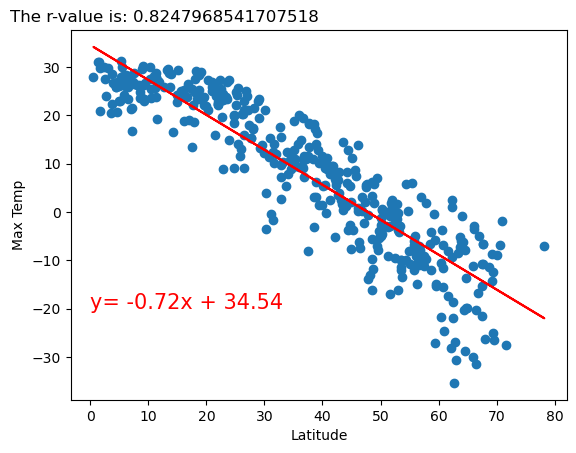

In [62]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', 0, -20)


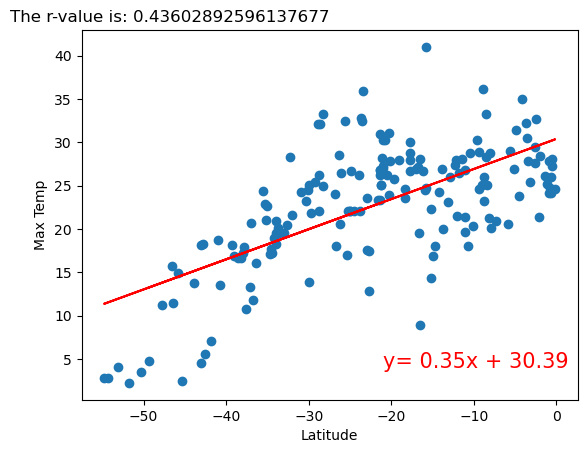

In [63]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', -21, 4)

**Discussion about the linear relationship:** The relationship between maximum temperature and latitude in northern hemisphere is represented by a negative correlation. As th latitude increases, the max temperature decreases and vice versa. However, the relationship between maximum temperature and latitude for cities in the southern hemisphere exhibits a positive correlation. The closer the city is to the equator, maximum temperatures generally increase,and they  decrease when moving towards higher latitudes.

### Humidity vs. Latitude Linear Regression Plot

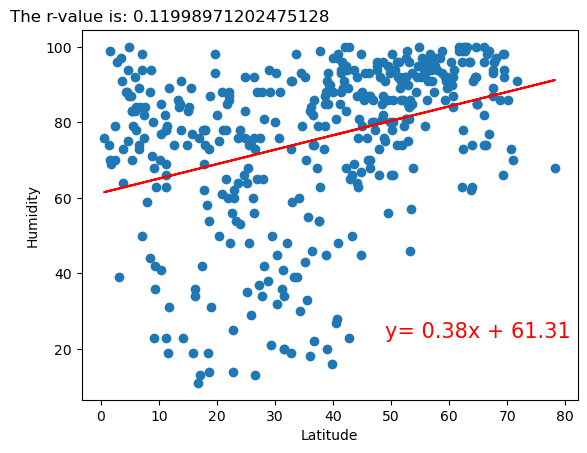

In [64]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 49, 23)

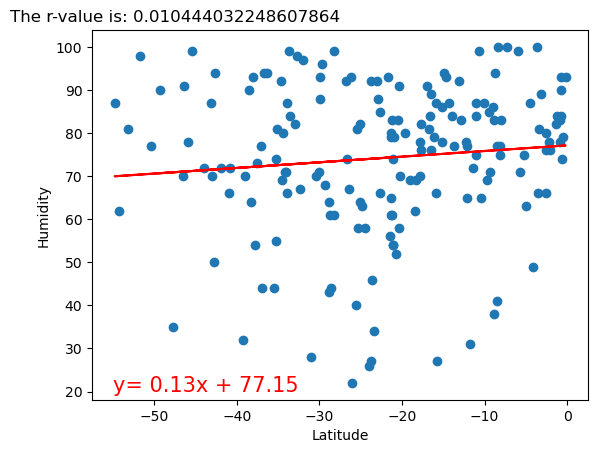

In [65]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', -55, 20)

**Discussion about the linear relationship:** Comparing the r-vallue associated with the northern hemisphere, when plotting humidity vs latitude, to the southern hemisphere, we can see that there is a small corellation in both instances, but there is a more noticeable linear relationship between humidy and latitude in the northern hemisphere. It seems that other geography and climate factors may be of better use in analysis.

### Cloudiness vs. Latitude Linear Regression Plot

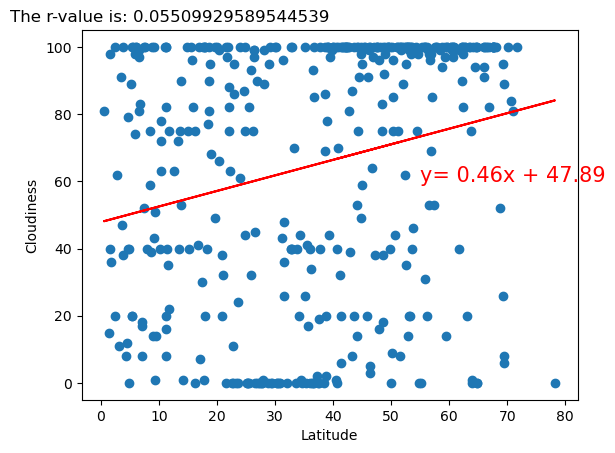

In [66]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 55, 60)

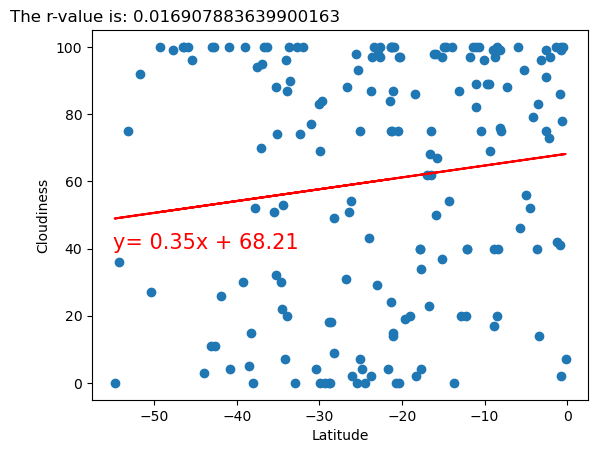

In [67]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', -55, 40)

**Discussion about the linear relationship:** Again, we see a very small r-value associated with both the northern hemisphere data and the southern hemsiphere data when comparing latitude with cloudiness. This shows us that there is great variability and we may find more sound evidence with other data comparions. This shows us that any linear relationships between cloudiness and latitude are influenced by various other factors, although there is a slightly positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

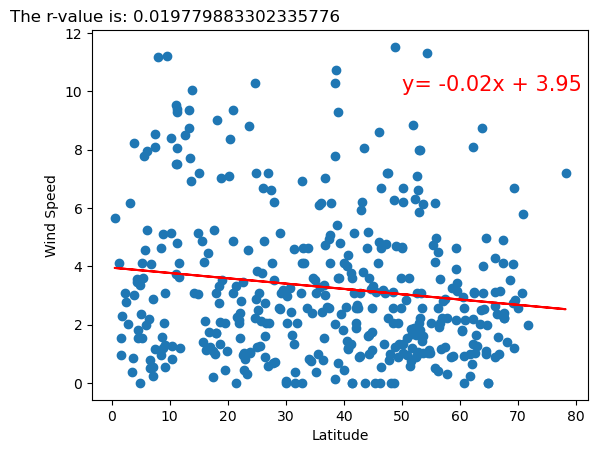

In [68]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 50, 10)

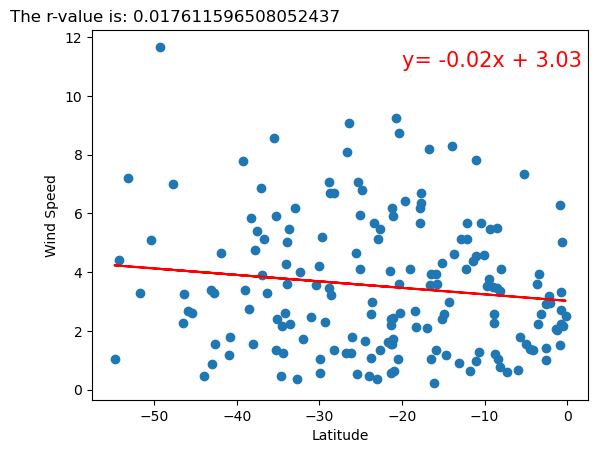

In [69]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', -20, 11)

**Discussion about the linear relationship:** When comparing wind speed with latitude in the northern hemisphere's cities and the southern hemisphere's cities, we see a very slight negative correlation. The r-values associated with each graph, however, are very small while alludes to the nature of a small correlation between wind speed and latitude. This would then point us in the direction of trying to find more conclusive data in which we could draw further specific observations from.